In [1]:
import math
import scipy.stats as st
import PIL.Image as pilimg

In [2]:
# 분산과 표준편차에 대한 카이제곱 검정
# 하나의 분산 혹은 표준편차에 대한 주장을 검정하기 위해 사용된다.

# 하나의 분산에 대한 카이제곱 검정을 위한 가정들
# 1. 표본은 모집단으로부터 임의로 뽑혀져야한다.
# 2. 연구 중인 변수에 대해 모집단은 정규분포를 해야 한다.
# 3. 관찰값들은 서로 독립이어야 한다.

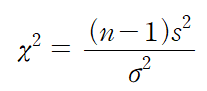

In [3]:
formula = pilimg.open("C:\\Users\\Msi\\Desktop\\통계 프로그래밍 연습\\하나의 분산에 대한 카이제곱 검정을 위한 공식.png")
formula

In [4]:
def chi_square_cv(s, sigma, n, alpha, side_type):
    X_square = ((n-1)*math.pow(s, 2)) / math.pow(sigma, 2)
    if side_type == 'left':
        cv = st.chi2.ppf(alpha, n-1)
        if cv <= X_square:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 귀무가설을 기각한다.".format(X_square, cv))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f} 밖에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv))
    elif side_type == 'right':
        cv = st.chi2.ppf(1-alpha, n-1)
        if X_square <= cv:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 귀무가설을 기각한다.".format(X_square, cv))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f} 밖에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv))
    elif side_type == 'both':
        cv_left = st.chi2.ppf(alpha/2, n-1)
        cv_right = st.chi2.ppf(1-(alpha/2), n-1)
        if X_square <= cv_left:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 때문에 귀무가설을 기각한다.".format(X_square, cv_left))
        elif cv_right <= X_square:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 때문에 귀무가설을 기각한다.".format(X_square, cv_right))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f}와 임계값 {:.3f} 사이에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv_left, cv_right))
    else:
        print("side_type을 left, right, both 중에 골라주세요.")

In [5]:
chi_square_cv(11.2, 8, 15, 0.1, 'right')

검정값 27.440이 임계값 21.064 밖에 있기 때문에 귀무가설을 기각하지 않는다.


In [6]:
chi_square_cv(math.sqrt(198), math.sqrt(225), 23, 0.05, 'left')

검정값 19.360이 임계값 12.338 안에 포함되기 때문에 귀무가설을 기각한다.


In [7]:
chi_square_cv(1, math.sqrt(0.644), 20, 0.05, 'both')

검정값 29.503이 임계값 8.907와 임계값 32.852 사이에 있기 때문에 귀무가설을 기각하지 않는다.
